### Hierarchical Clustering and KMeans - Segmentation in Telecom Industry

In [1]:
#Import os, pandas and numpy
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data - Telco

In [3]:
# you can download the data these are easily avalable
telco = pd.read_csv("Telco.csv")

In [4]:
telco.sample(5)

,Calls,Intern,Text,Data,Age
563,2.43,0.10,20.12,0.57,30
841,1.45,0.11,592.45,2.76,12
443,2.27,0.09,21.69,0.43,35
417,1.43,0.11,598.54,2.76,15
392,1.42,0.10,451.95,3.31,12


## Scaling the Data

In [7]:
telco_scaled = telco.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [6]:
telco_scaled.head()

,Calls,Intern,Text,Data,Age
0,-0.996125,-0.569290,-0.940982,-1.299162,1.372936
1,-1.022513,-0.489795,-0.969806,-1.262765,1.002273
2,0.600387,-0.383802,0.303060,0.018380,-0.233271
3,-1.015916,-0.516293,-0.963302,-1.277324,1.434713
4,-1.048902,-0.436798,-0.957780,-1.284603,1.125827


## Plotting a Dendrogram

In [5]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

**Study the functions:**

* dendrogram https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html 
* linkage    https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [10]:
Z = linkage(telco_scaled, 'complete')

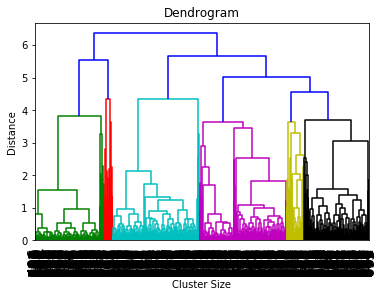

In [11]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=15.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

In [ ]:
#help(dendrogram)

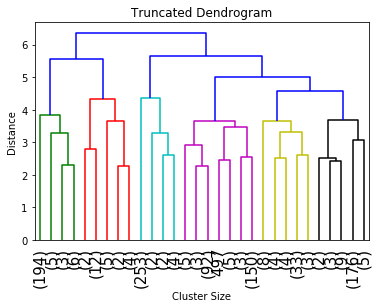

In [11]:
dendrogram(Z,truncate_mode='lastp',p=30,leaf_rotation=90, leaf_font_size=15.)
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

## Agglomerative Hierarchical Clustering

In [13]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [14]:
hclust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

In [15]:
hclust.fit(telco_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete',
            memory=Memory(cachedir=None), n_clusters=5,
            pooling_func=<function mean at 0x0000021856F9E488>)

## Grouping the Data

In [17]:
telco['Groups'] = hclust.labels_

In [19]:
#telco.head(10)

## Checking the Aggregate of the groups

In [20]:
telco.groupby(['Groups']).mean()

,Calls,Intern,Text,Data,Age
Groups,,,,,
0,4.472227,1.010486,82.832146,2.009190,43.149798
1,4.700400,0.432400,376.350800,1.545600,46.120000
2,1.763410,0.131456,507.732146,3.731073,19.003831
3,1.068846,0.238702,45.874567,0.355288,60.610577
4,2.800039,0.233514,204.993282,1.475405,32.424710


## K-Means Clustering

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=5,n_init=40)

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [7]:
#Fit the kmeans model
km.fit(telco_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=40, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Cluster labels
km.labels_

In [8]:
#Within Group SSE
km.inertia_

785.9308775068455

In [9]:
#Calculating the within group SSE for different cluster solutions
inertias = []
for k in [2,3,4,5,6,7]:
    km = KMeans(n_clusters=k,n_init=40)
    inertia = km.fit(telco_scaled).inertia_
    inertias.append(inertia)

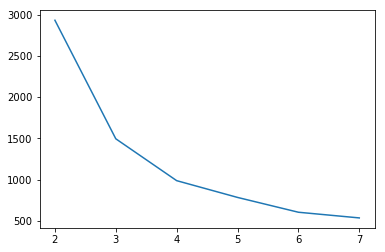

In [10]:
#Plotting the scree plot
plt.plot([2,3,4,5,6,7], inertias)
plt.show()

## Further Readings and References

http://research.stowers.org/mcm/efg/R/Visualization/cor-cluster/index.htm

https://datascience.stackexchange.com/questions/17927/categorical-data-in-kmeans


https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

Single Linkage Vs Complete Linkage
https://nlp.stanford.edu/IR-book/html/htmledition/single-link-and-complete-link-clustering-1.html